<a href="https://colab.research.google.com/github/HolymixMe/credit_risk/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

**Mengimport Data**

In [ ]:
# Buat URL unduhan langsung
download_url = f'https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv'

# Baca file CSV dari URL
data = pd.read_csv(download_url, low_memory=False)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# **Data Preparation**

In [ ]:
# Cek missing values dan data duplikat
print("\nMissing values per fitur:")
print(data.isnull().sum())
print("\nData duplikat:")
print(data.duplicated().sum())


Missing values per fitur:
Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

Data duplikat:
0


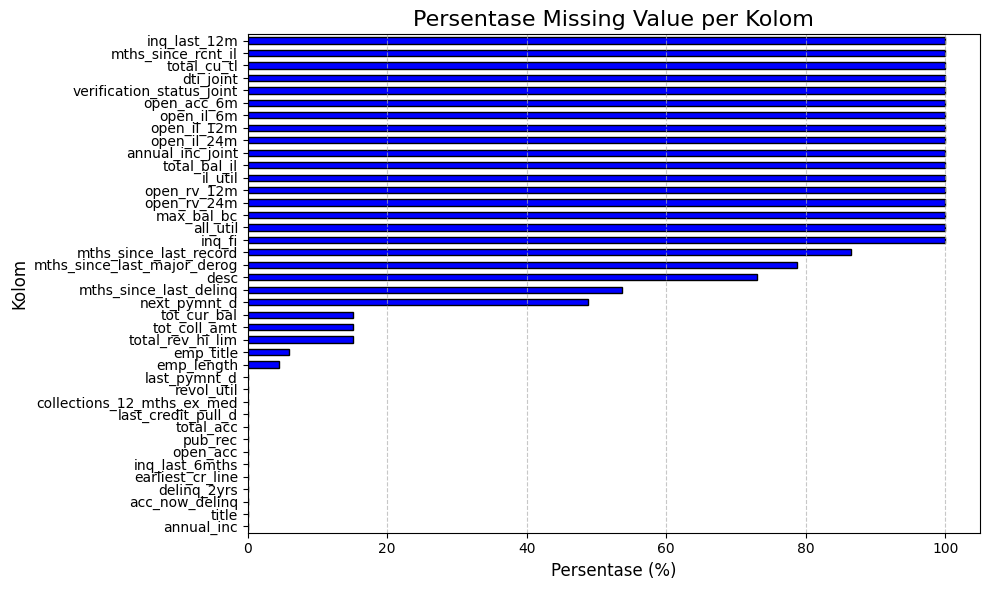

In [ ]:
# Menghitung persentase missing values per kolom
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Menyaring hanya kolom dengan missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Mengurutkan dari persentase tertinggi ke terendah
missing_percentage = missing_percentage.sort_values(ascending=True)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Persentase Missing Value per Kolom', fontsize=16)
plt.xlabel('Persentase (%)', fontsize=12)
plt.ylabel('Kolom', fontsize=12)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Menghitung persentase missing values per kolom
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Menyaring kolom dengan missing values <= 15%
columns_to_keep = missing_percentage[missing_percentage <= 15].index

# Menghapus kolom dengan missing values > 15%
data = data[columns_to_keep]

data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

# Membuang kolom kategori yang nilai unique > 35
for col in data.select_dtypes("object").columns:
    if len(data[col].value_counts()) > 35:
        print("Kolom terapus: ", col)
        data = data.drop(col, axis=1)


Kolom terapus:  emp_title
Kolom terapus:  issue_d
Kolom terapus:  url
Kolom terapus:  title
Kolom terapus:  zip_code
Kolom terapus:  addr_state
Kolom terapus:  earliest_cr_line
Kolom terapus:  last_pymnt_d
Kolom terapus:  last_credit_pull_d


In [ ]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
o

In [ ]:
# Imputasi untuk setiap kolom
imputer = SimpleImputer(strategy='most_frequent')

for col in data.columns:
    # Terapkan imputasi untuk setiap kolom
    data[col] = imputer.fit_transform(data[[col]]).ravel()

print(data)

             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       1077501    1296599       5000         5000           4975.0   
1       1077430    1314167       2500         2500           2500.0   
2       1077175    1313524       2400         2400           2400.0   
3       1076863    1277178      10000        10000          10000.0   
4       1075358    1311748       3000         3000           3000.0   
...         ...        ...        ...          ...              ...   
466280  8598660    1440975      18400        18400          18400.0   
466281  9684700   11536848      22000        22000          22000.0   
466282  9584776   11436914      20700        20700          20700.0   
466283  9604874   11457002       2000         2000           2000.0   
466284  9199665   11061576      10000        10000           9975.0   

              term  int_rate  installment grade sub_grade  ...  \
0        36 months     10.65       162.87     B        B2  ...   
1        60 mon

In [ ]:
# Cek missing values dan data duplikat
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prn

# **Exploratory Data Analysis**

In [ ]:
# Distribusi fitur numerik
def numerical_distribution(data: pd.DataFrame):
    num_cols = data.select_dtypes("number").columns
    rows, cols = int(np.ceil(len(num_cols) / 4)), 4

    plt.figure(figsize=(24, 24))
    for i, col in enumerate(num_cols):
        ax = plt.subplot(rows, cols, i + 1)
        sns.kdeplot(data=data, x=col, fill=True, ax=ax)

        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(12)

        ax.set_xlabel(col, fontsize=24)

    plt.tight_layout()
    plt.show()

In [ ]:
def categorical_distribution(df: pd.DataFrame):
    cat_cols = df.select_dtypes(["object", "category"]).columns

    for i, col in enumerate(cat_cols):
        plt.figure(figsize=(12, 6))
        counts = df[col].value_counts()
        long_label = (
            len(sorted(counts.index.tolist(), key=lambda x: len(x), reverse=True)[0])
            > 10
        )
        sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette ="viridis")

        if long_label:
            plt.xticks([i for i in range(len(counts.index))], counts.index, rotation=90)

        plt.xlabel(col, fontsize=12)

    plt.show()

<ipython-input-61-8870bec34b38>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x=col, fill=True, ax=ax)


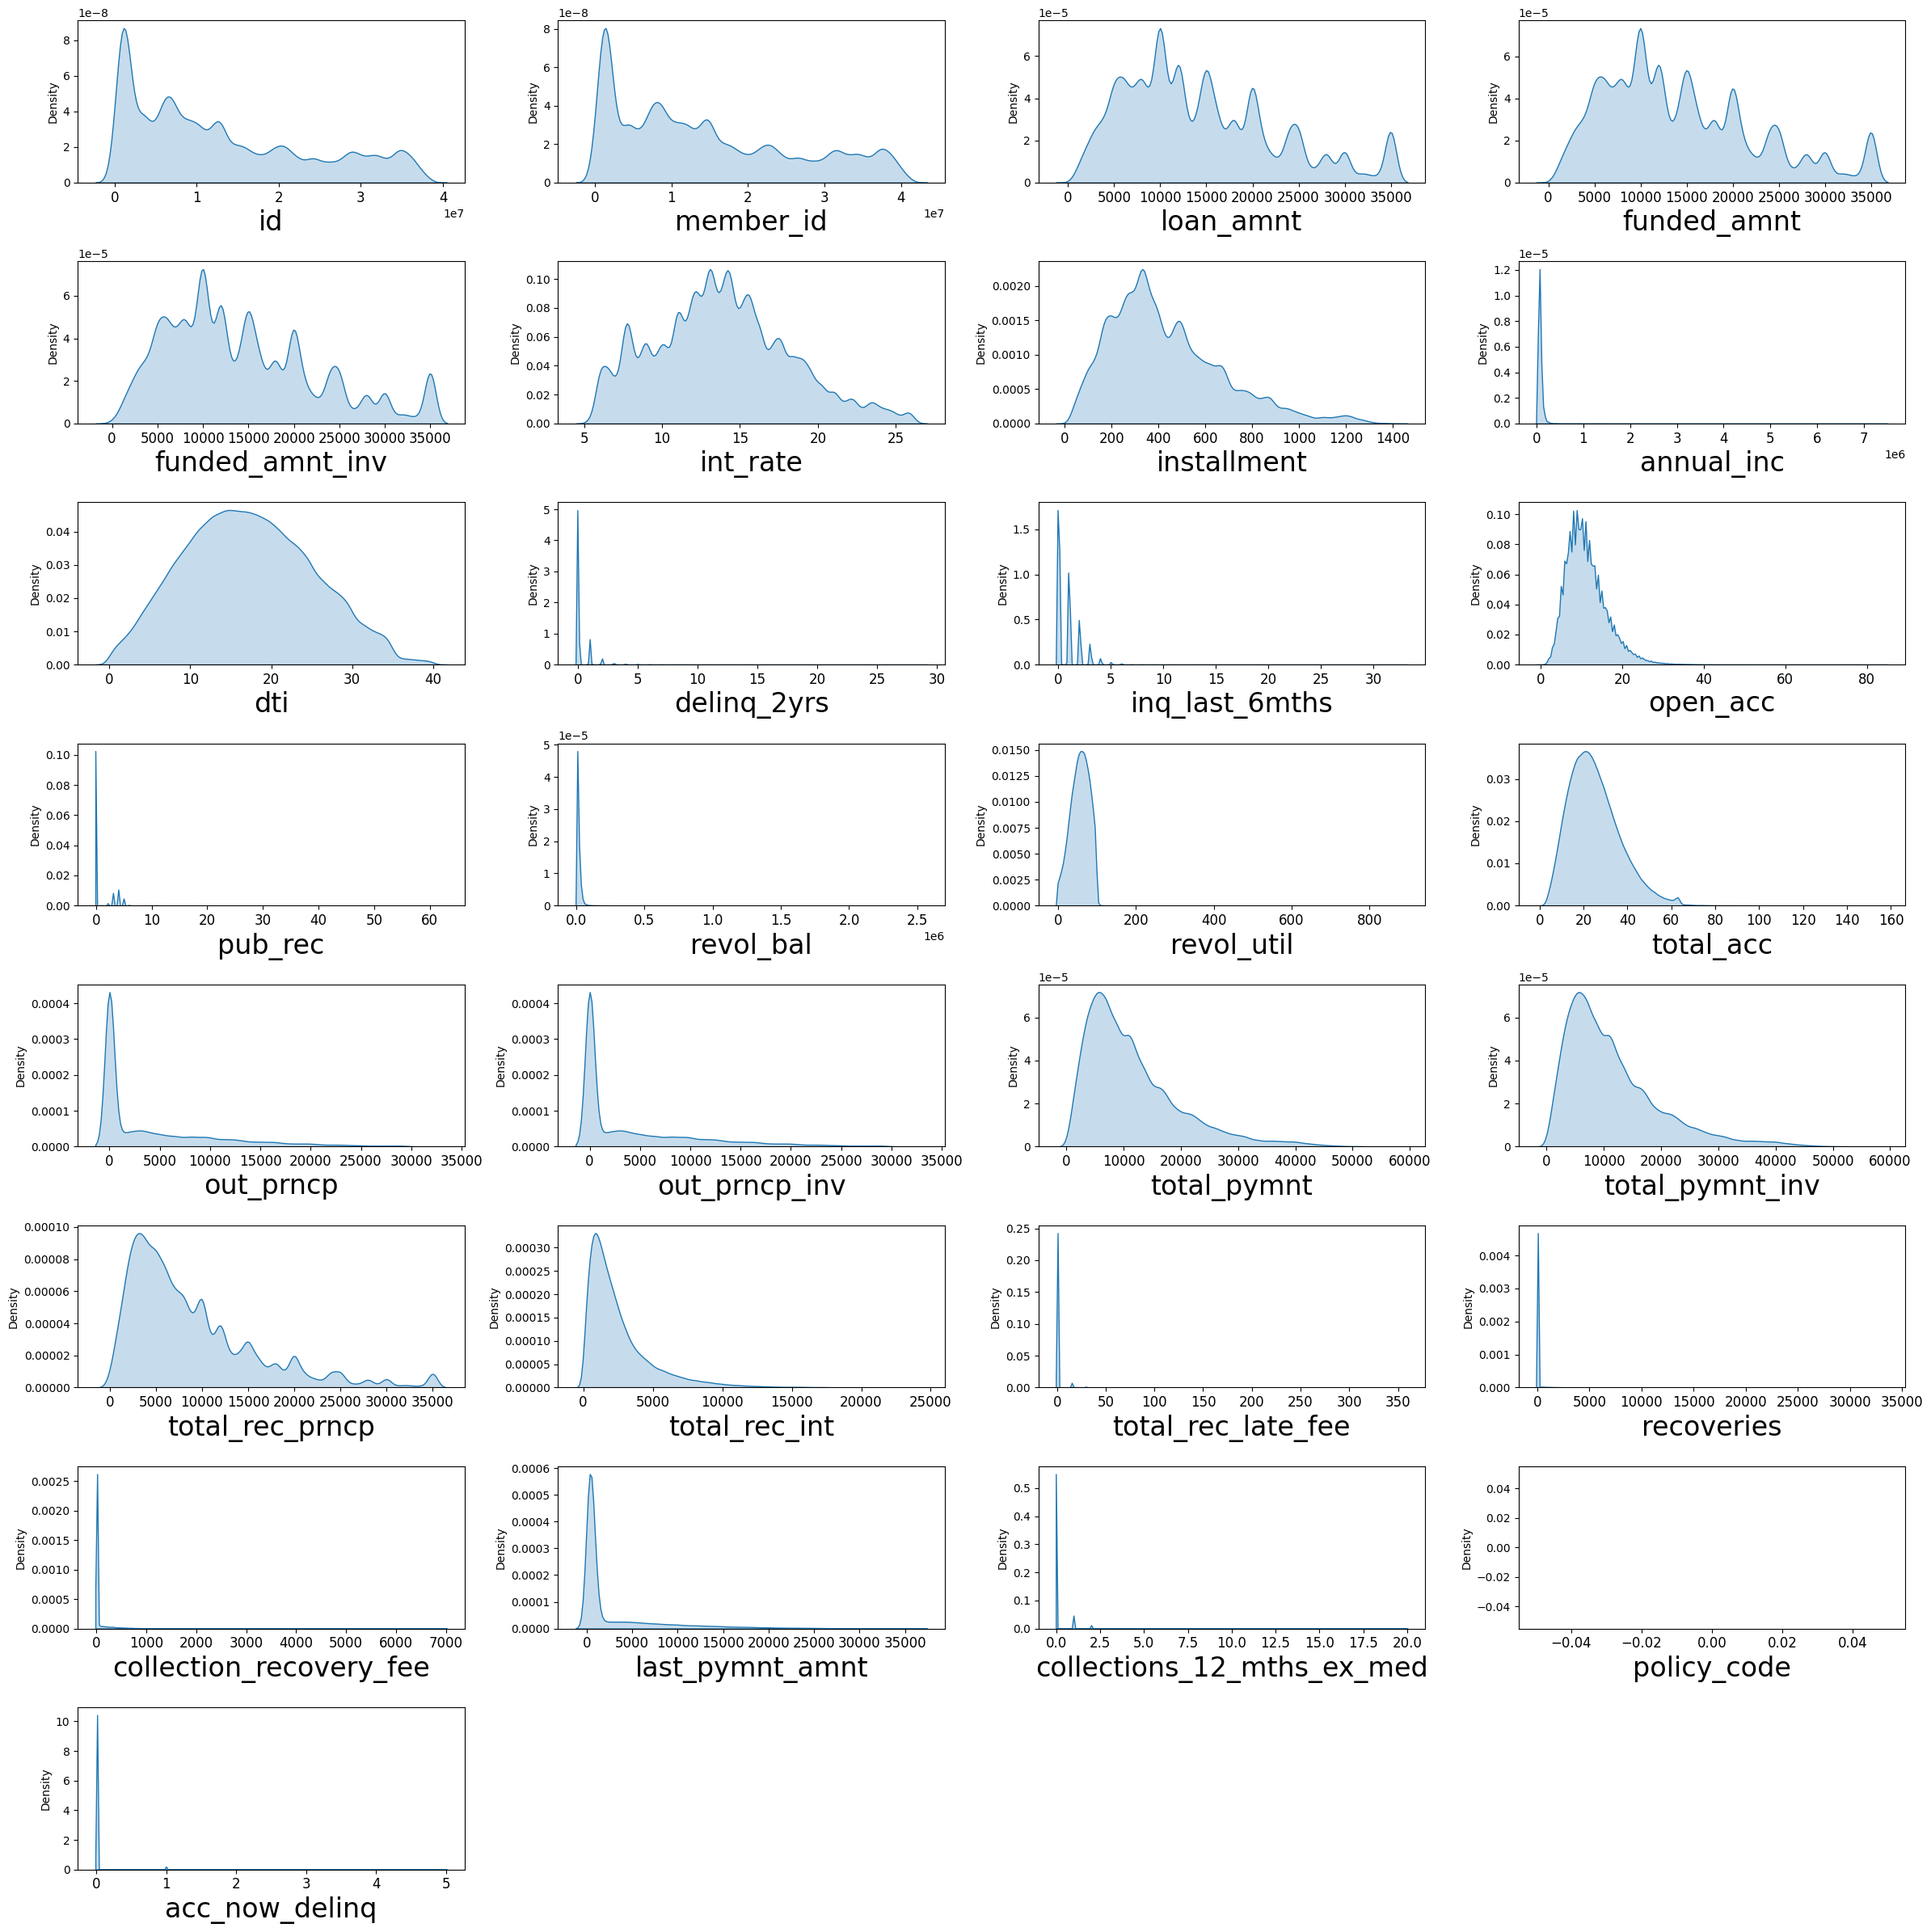

In [ ]:
numerical_distribution(data)

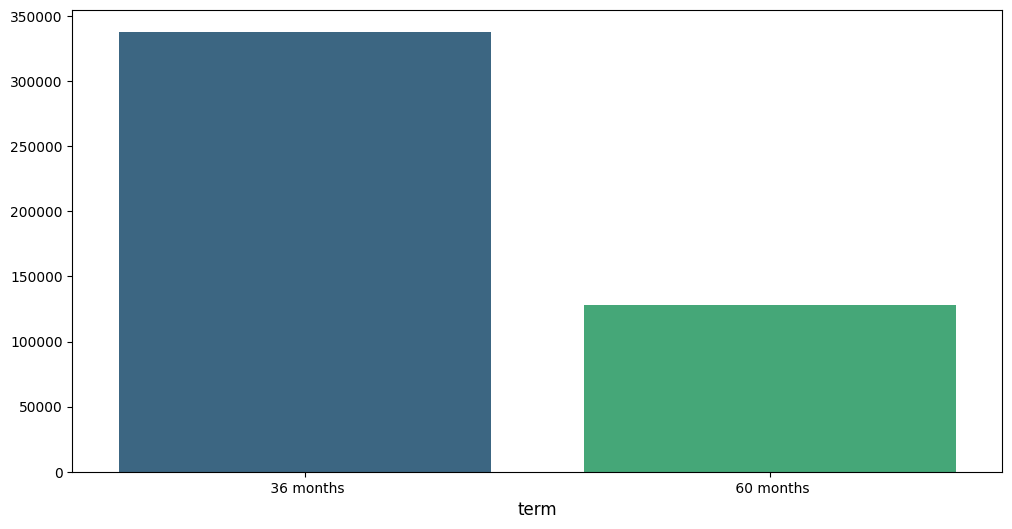

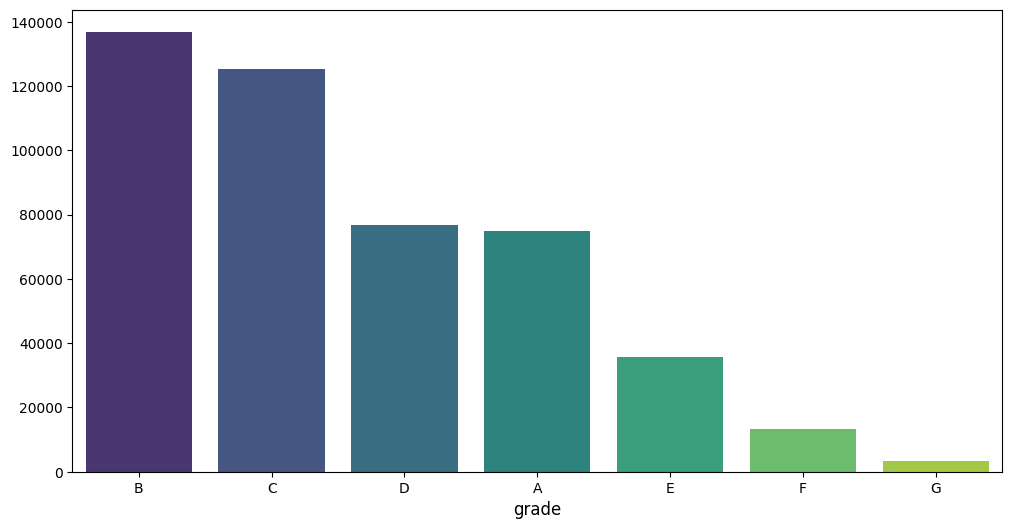

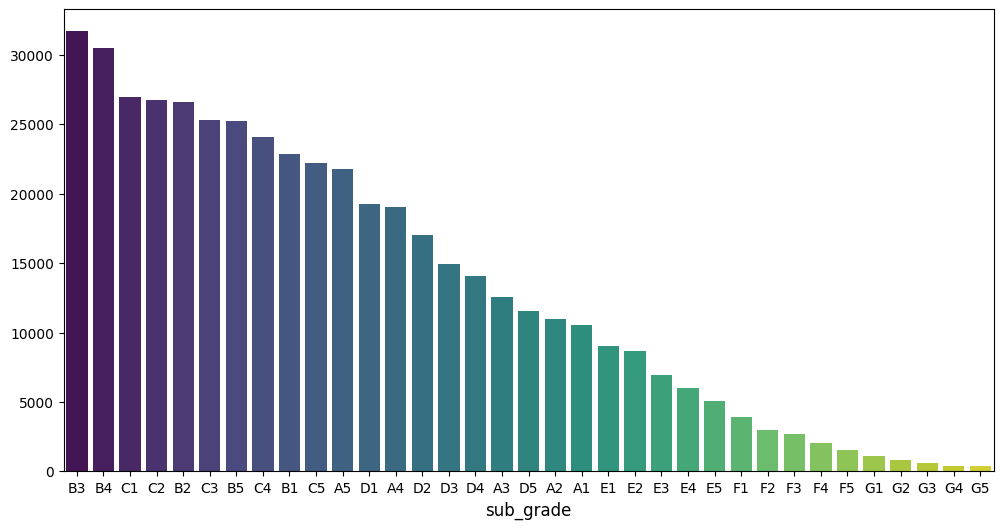

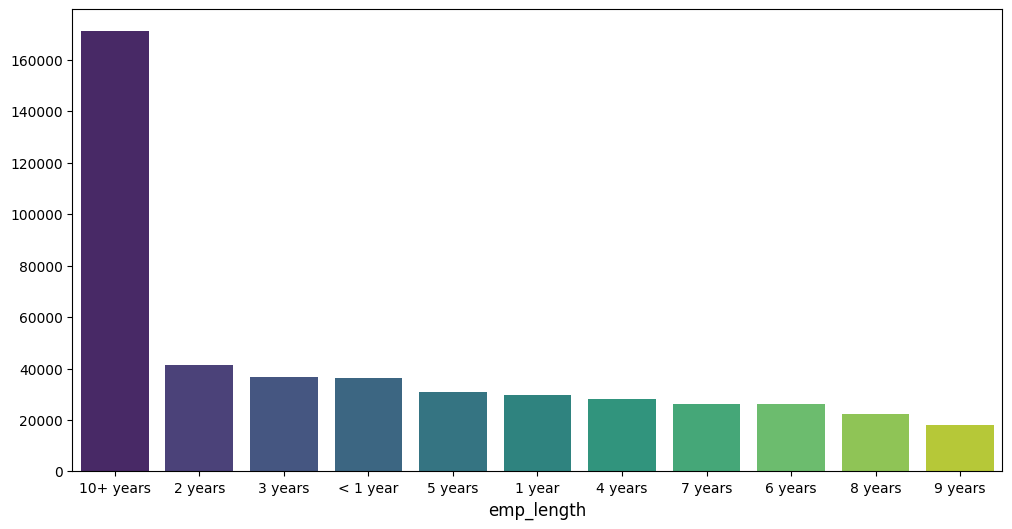

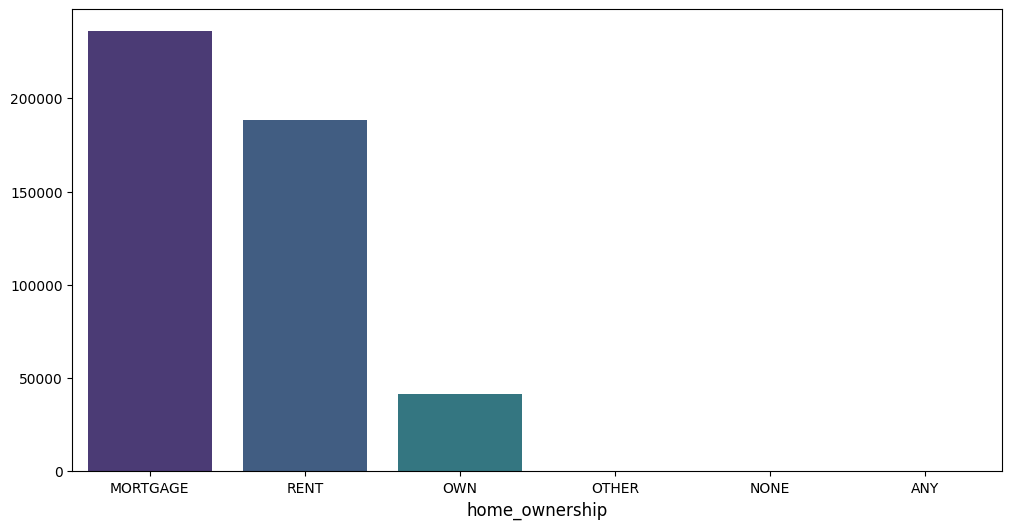

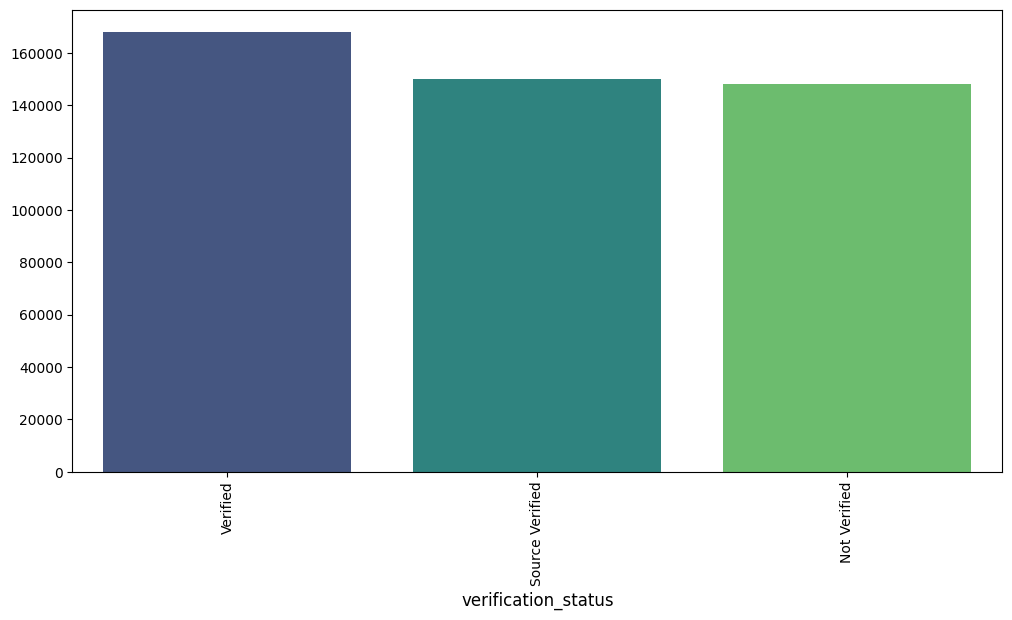

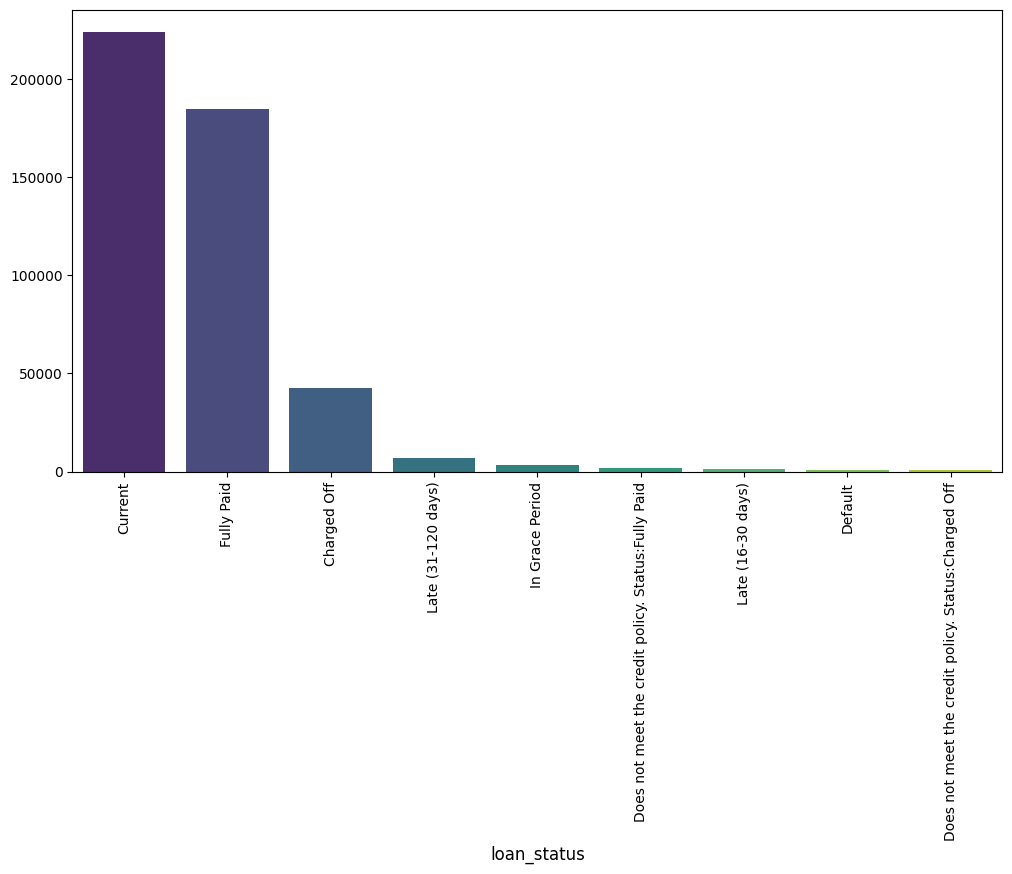

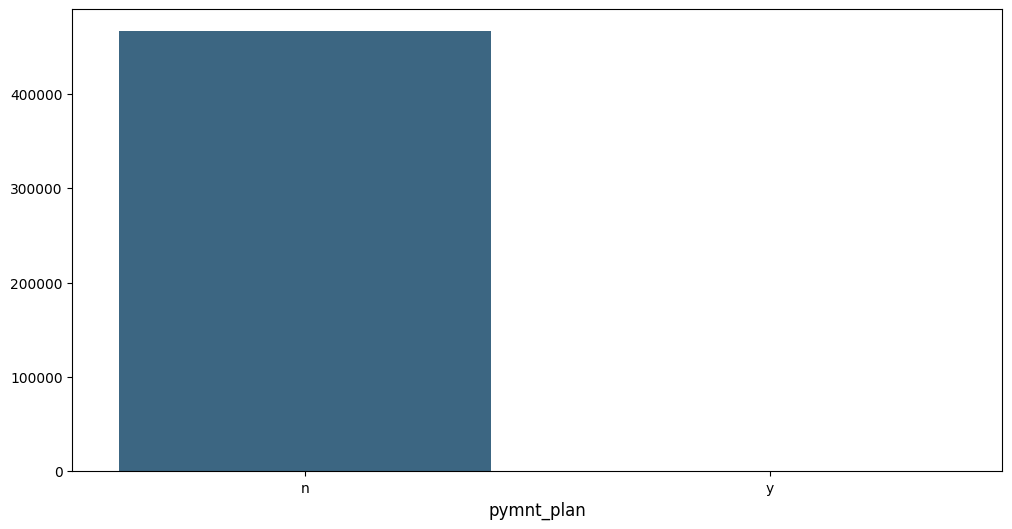

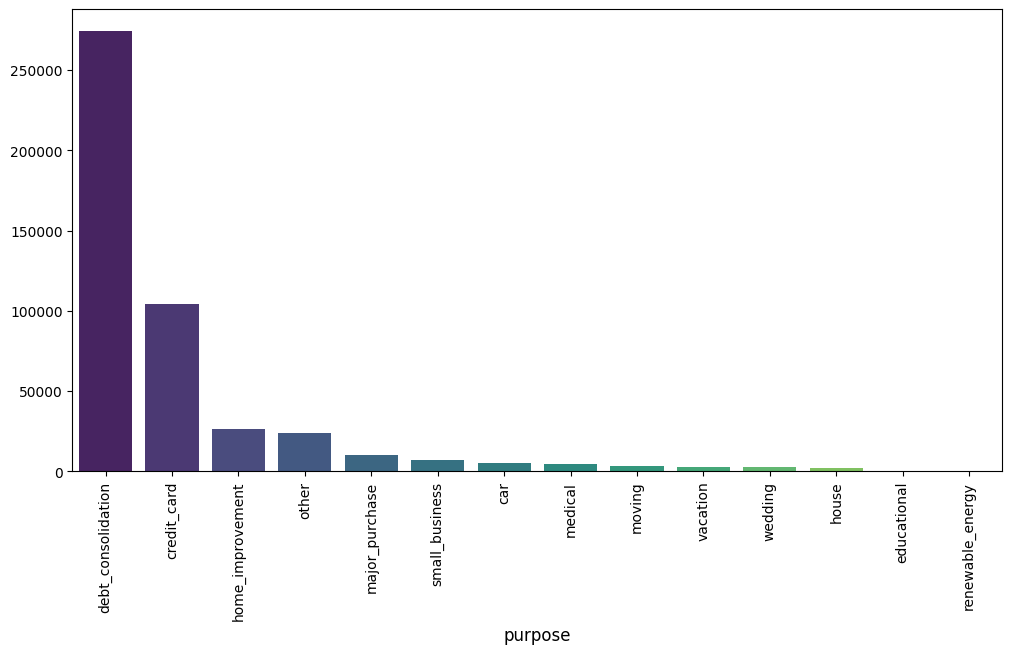

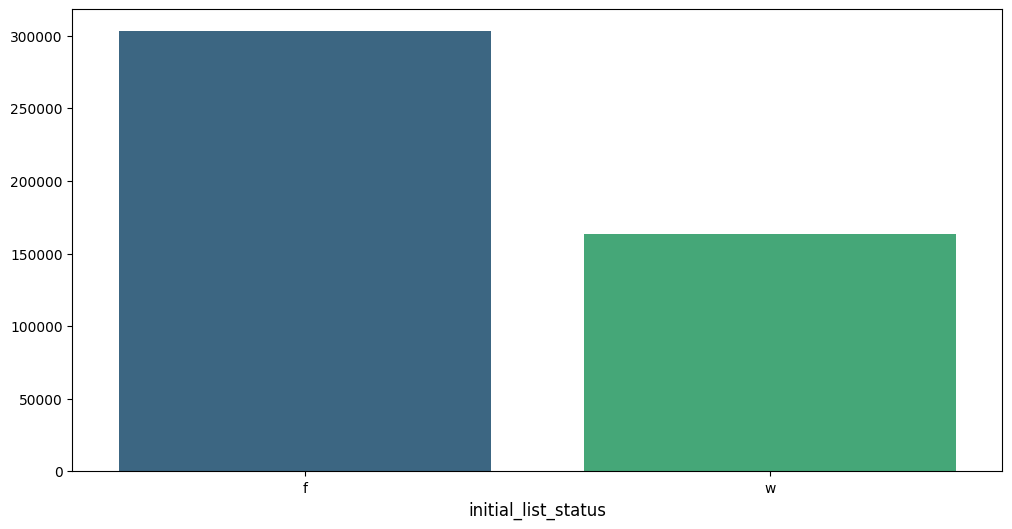

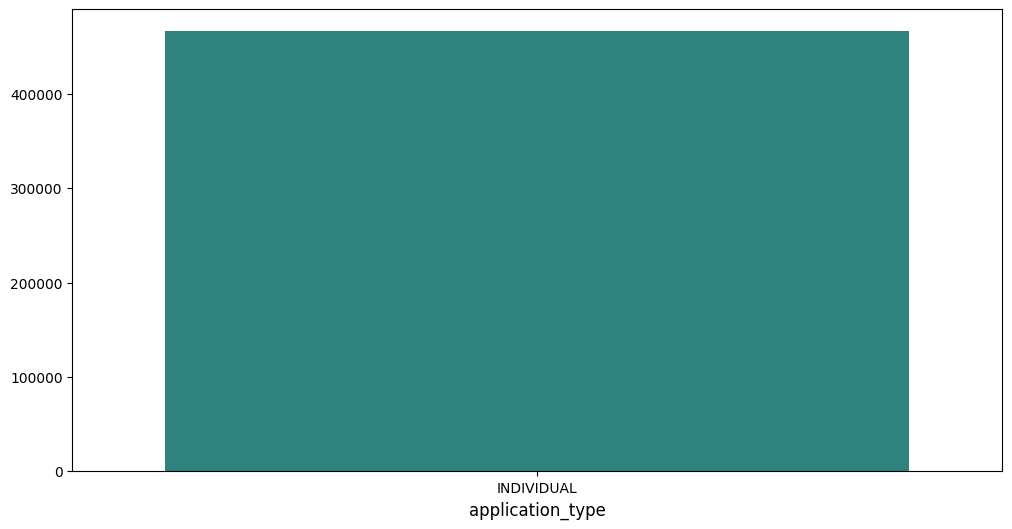

In [ ]:
categorical_distribution(data)

Dari hasil visualisasi banyak terdapat fitur yang kurang seimbang atau kurang baik untuk menjadi prediktor

In [ ]:
data = data.drop(["id", "member_id", "pymnt_plan", "application_type", "policy_code"], axis=1)
data.loc[:, "acc_now_delinq"] = data["acc_now_delinq"].astype(int).astype(str)
data.loc[:, "home_ownership"] = data["home_ownership"].apply(lambda x: "OTHER" if x in ["ANY", "NONE"] else x)

<ipython-input-65-6aa7cac452c2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '0' '0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:, "acc_now_delinq"] = data["acc_now_delinq"].astype(int).astype(str)


In [ ]:
# Daftar kategori good dan bad
good_status = [
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
    "Current",
    "In Grace Period",
]

bad_status = [
    "Charged Off",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (16-30 days)",
    "Late (31-120 days)",
    "Default",
]

# Mengubah kolom loan_status menjadi kategori good dan bad
data['loan_status'] = data['loan_status'].apply(
    lambda x: 'good' if x in good_status else 'bad' if x in bad_status else 'unknown'
)

# Memeriksa hasil transformasi
print(data['loan_status'].value_counts())


loan_status
good    414099
bad      52186
Name: count, dtype: int64


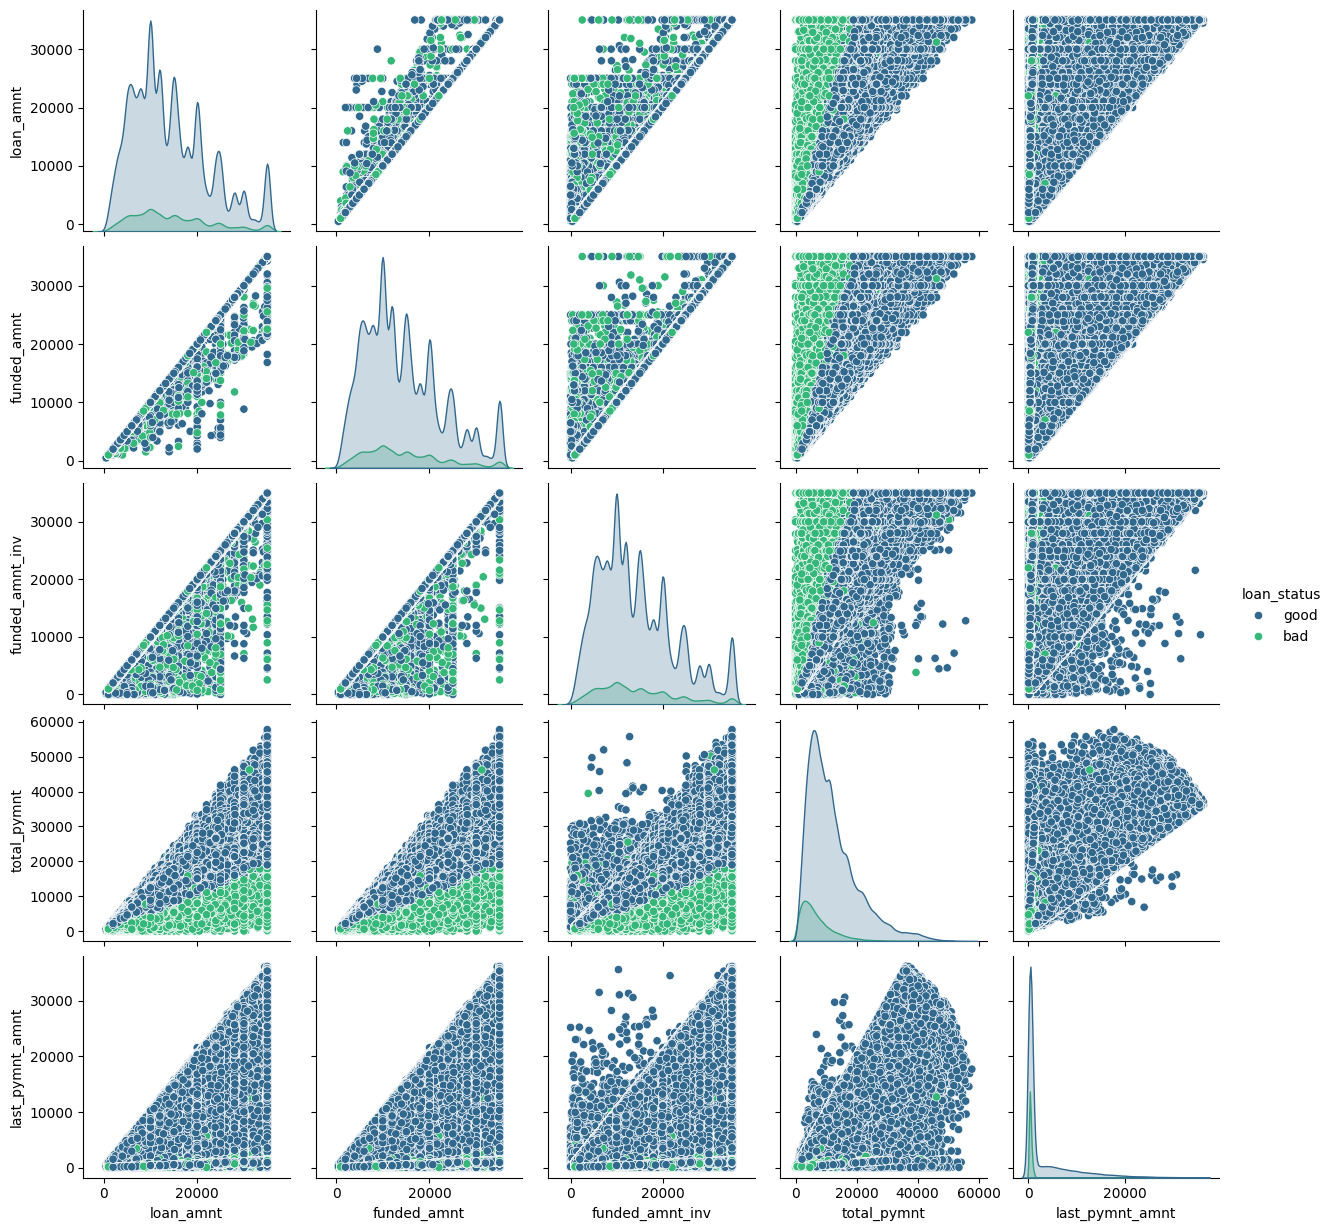

In [ ]:
obv_cols = [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "total_pymnt",
    "last_pymnt_amnt",
    "loan_status",]

sns.pairplot(data[obv_cols], diag_kind="kde", hue="loan_status", palette ="viridis")


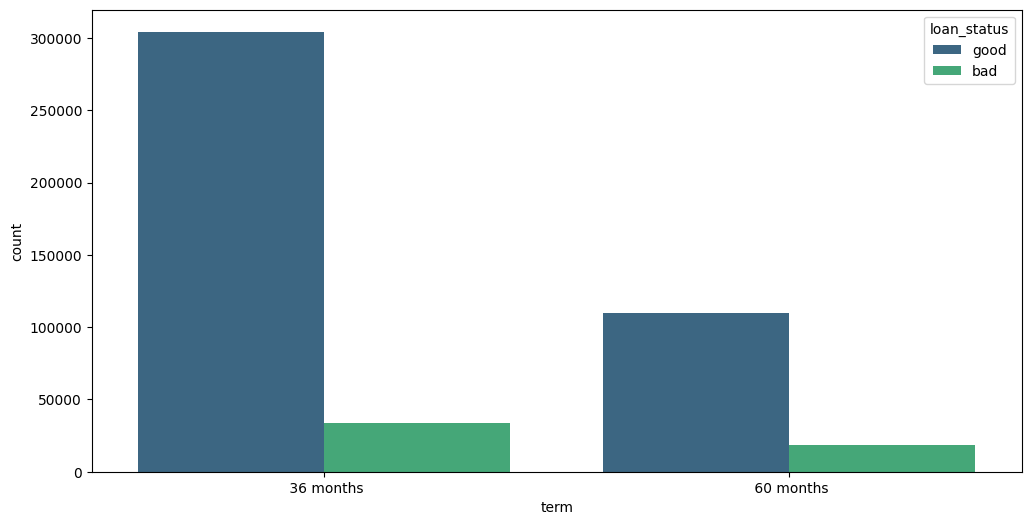

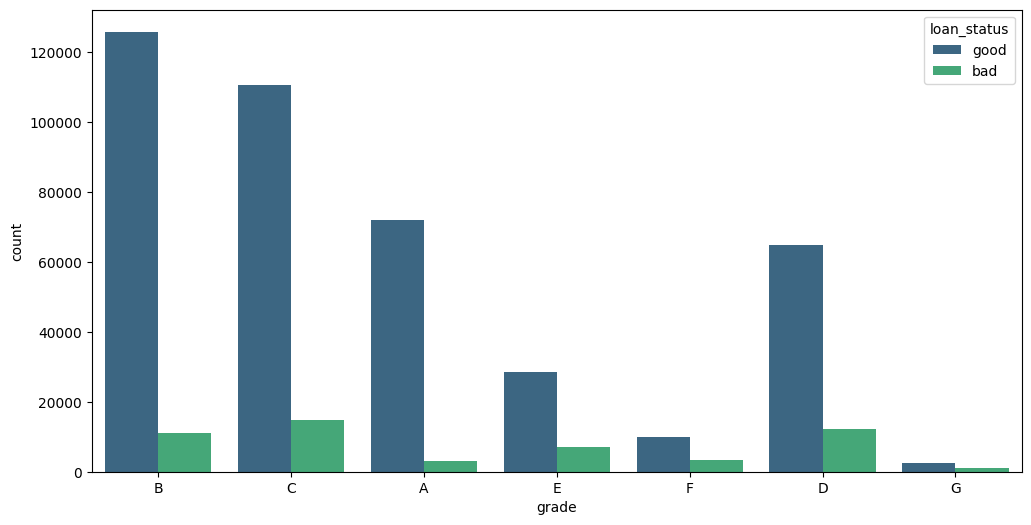

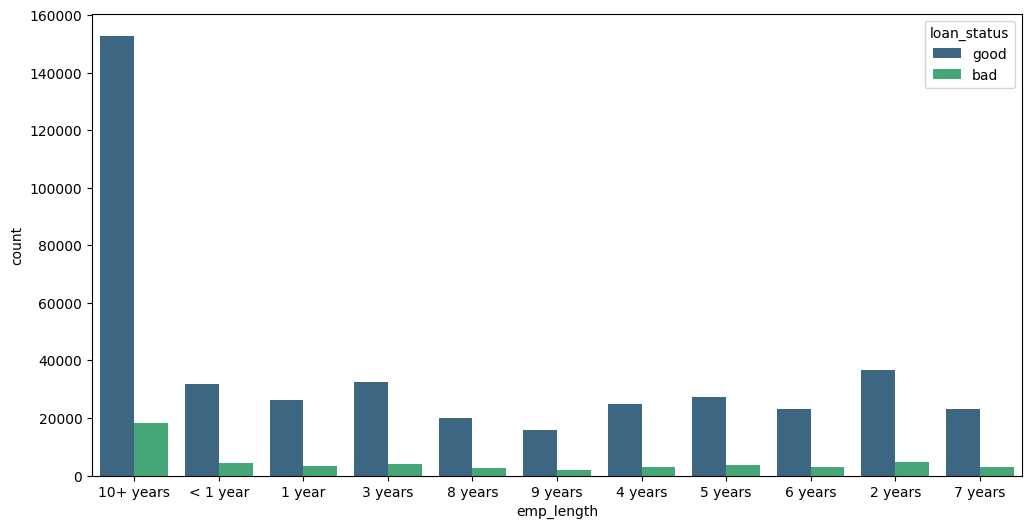

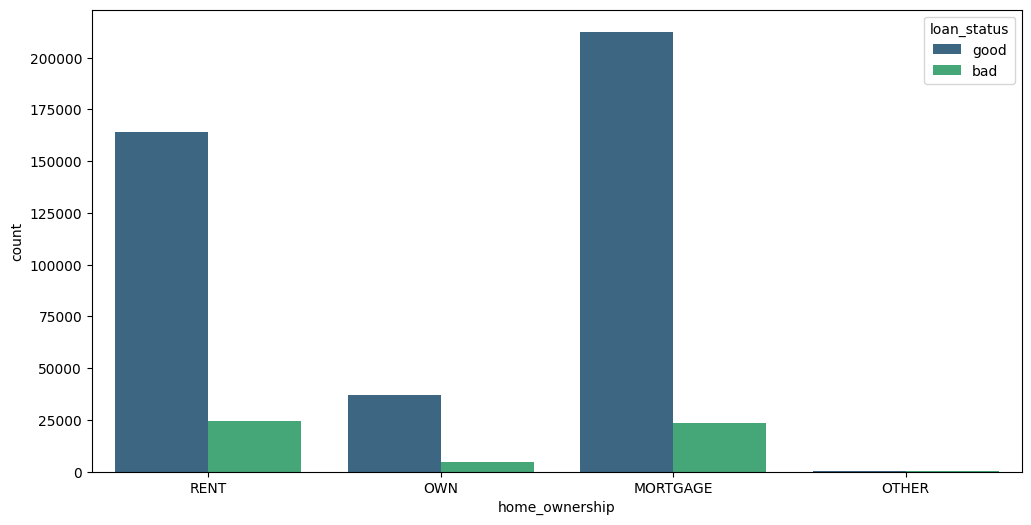

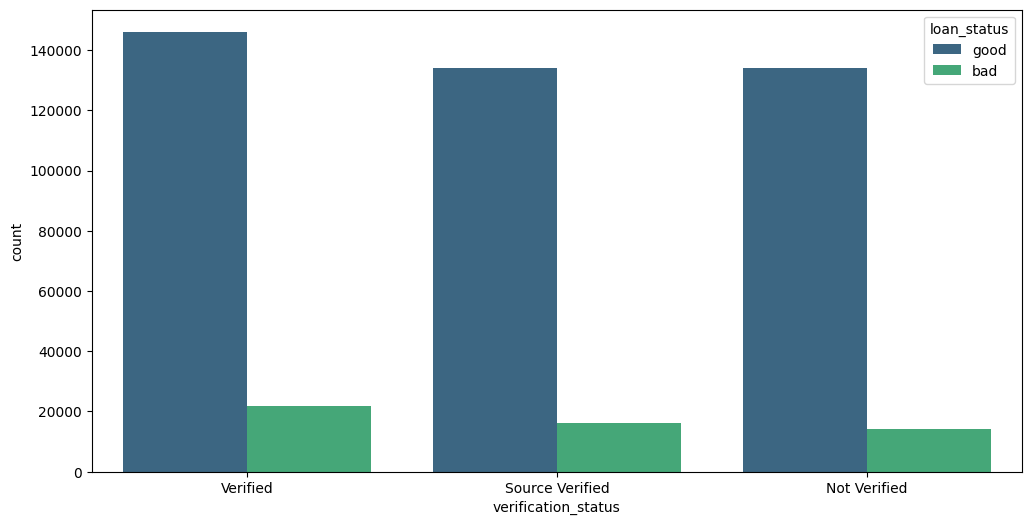

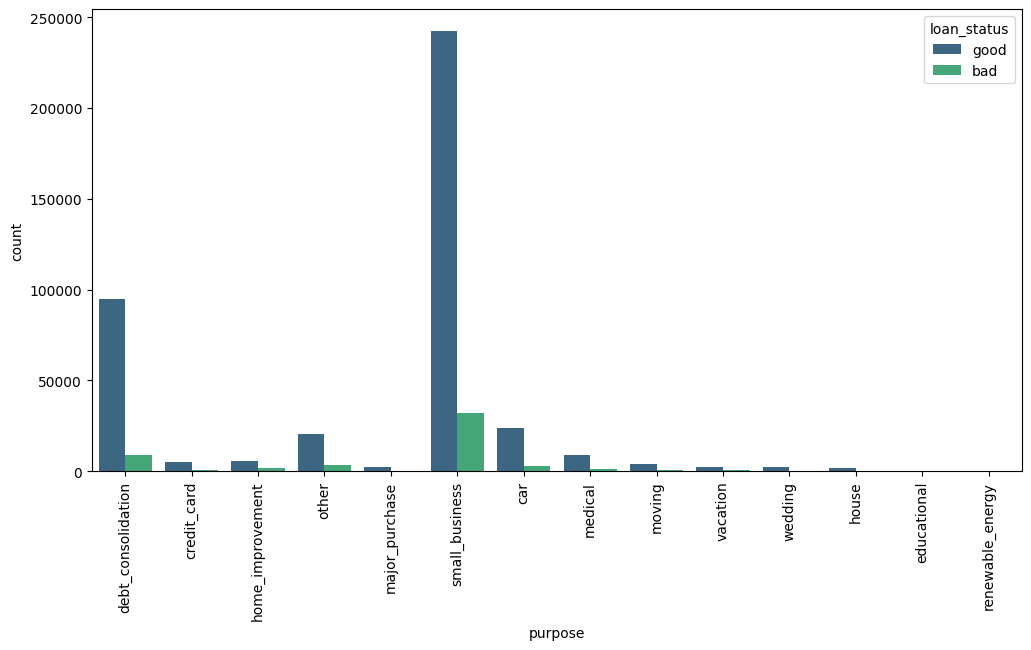

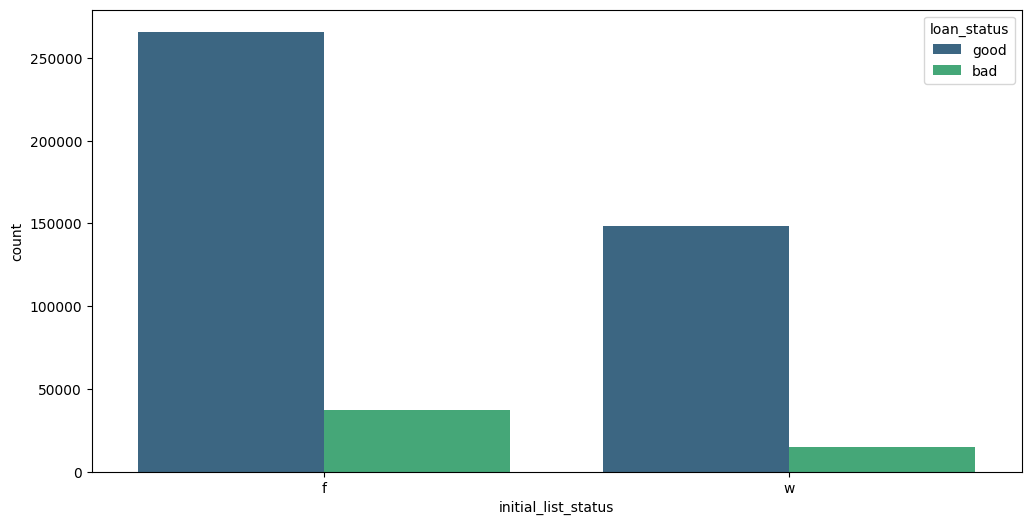

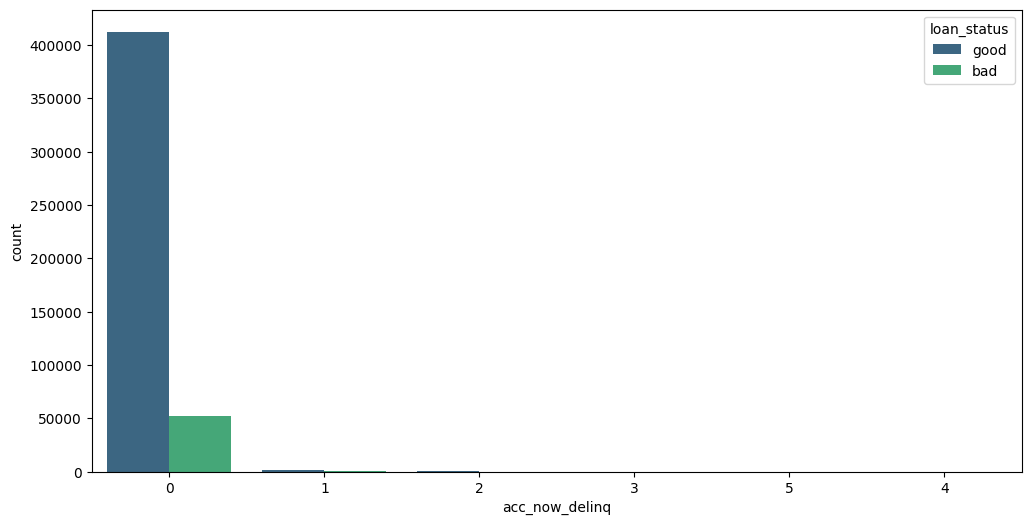

In [ ]:
categorical_coloumn = data.select_dtypes("object").columns.drop(["sub_grade", "loan_status"])

for cat in categorical_coloumn:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data[cat].sort_values(), hue=data["loan_status"], palette ="viridis")
    if cat == "purpose":
        ticks = data[cat].value_counts().index
        plt.xticks([i for i in range(len(ticks))], ticks, rotation=90)
    plt.show()

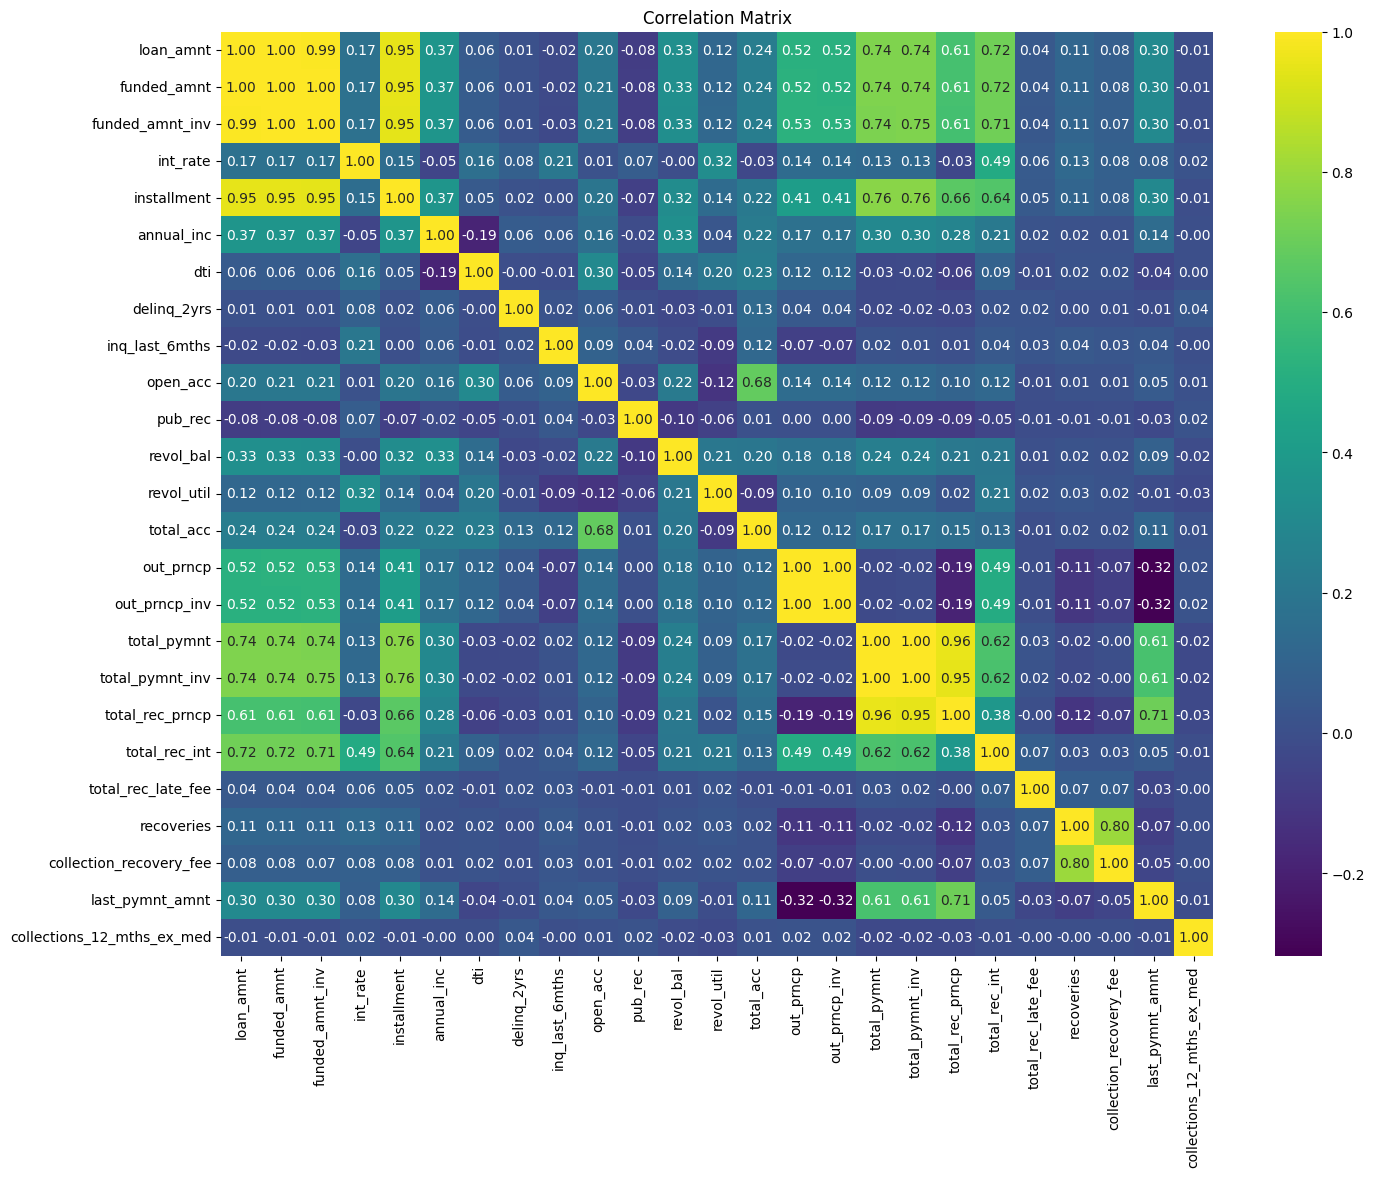

In [ ]:
# Menghitung matriks korelasi
numerical_data = data.select_dtypes(include=['number'])  # Memilih kolom numerik
correlation_matrix = numerical_data.corr()

# Visualisasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix")
plt.show()

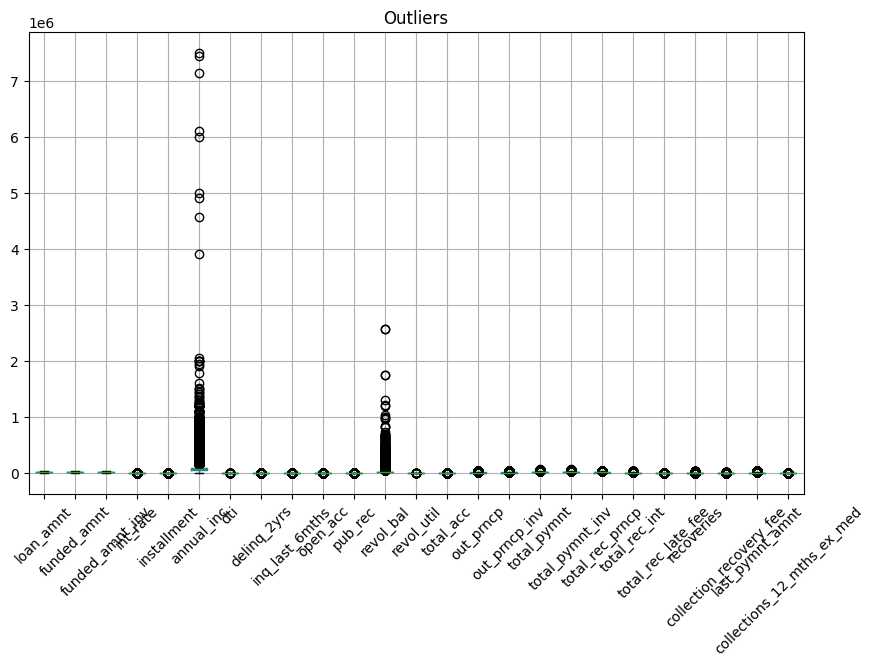

In [ ]:
# Deteksi outlier menggunakan IQR untuk semua kolom numerik
for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Visualisasi dengan boxplot
data.select_dtypes(include='number').boxplot(figsize=(10, 6))
plt.title('Outliers')
plt.xticks(rotation=45)
plt.show()

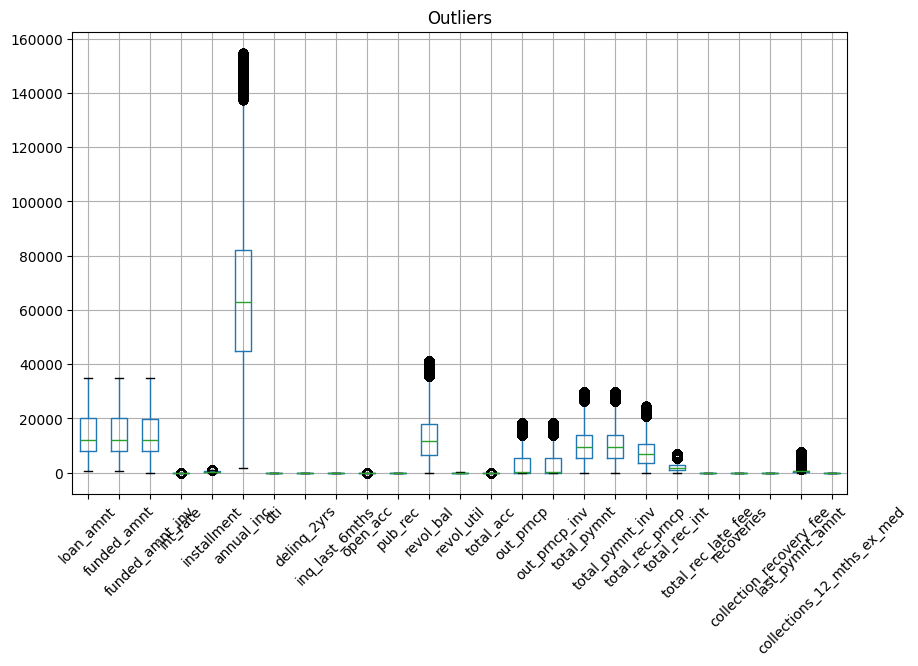

In [ ]:
# Menggunakan median untuk mengganti outlier
for column in data.select_dtypes(include='number').columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan median
    median_value = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),
                            median_value, data[column])
# Visualisasi dengan boxplot
data.select_dtypes(include='number').boxplot(figsize=(10, 6))
plt.title('Outliers')
plt.xticks(rotation=45)
plt.show()


# **Data Modelling**

In [ ]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [ ]:
numerical_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # Normalisasi kolom numerikal
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode kolom kategorikal
        ])

# Apply the preprocessing
le = LabelEncoder()
X_encoded = preprocessor.fit_transform(X)
y_encoded = le.fit_transform(y)

# Memeriksa pemetaan kategori ke label
print("Mapping kategori ke label:")
print(dict(zip(le.classes_, range(len(le.classes_)))))

Mapping kategori ke label:
{'bad': 0, 'good': 1}


In [ ]:
# Now apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Membangun model Logistic Regression
logreg_model = LogisticRegression(max_iter = 500)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Membangun model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluasi model
def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return cm, accuracy, f1, precision, recall

# Visualisasi confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



Logistic Regression:
Accuracy: 0.8335546969331079
F1 Score: 0.8334710302440621
Precision: 0.8341691843301839
Recall: 0.8335546969331079


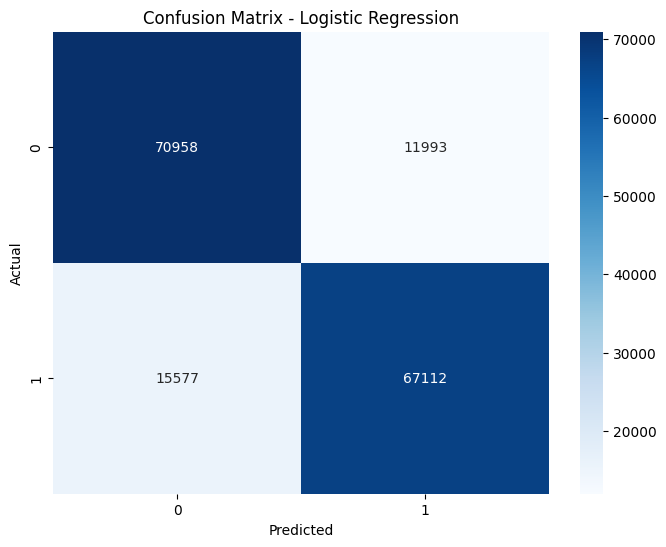

In [ ]:
# Evaluasi Logistic Regression
cm_logreg, accuracy_logreg, f1_logreg, precision_logreg, recall_logreg = evaluate_model(y_test, y_pred_logreg)
print("Logistic Regression:")
print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)

plot_confusion_matrix(cm_logreg, "Logistic Regression")

Random Forest:
Accuracy: 0.9810311518956774
F1 Score: 0.9810261187274173
Precision: 0.9815952347247034
Recall: 0.9810311518956774


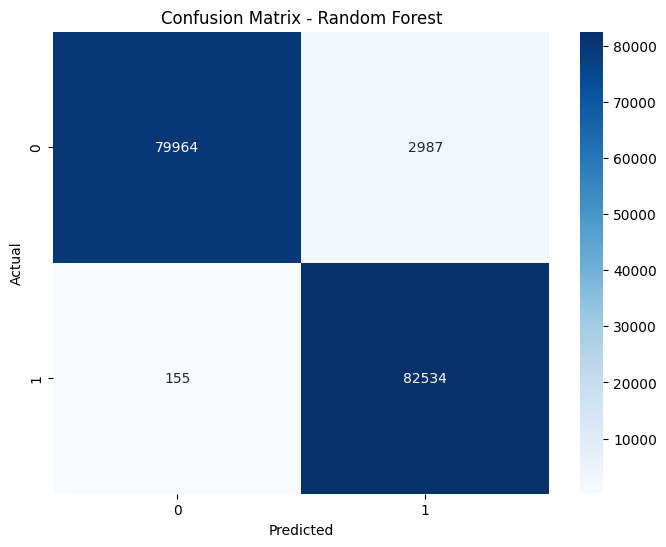

In [ ]:
# Evaluasi Random Forest
cm_rf, accuracy_rf, f1_rf, precision_rf, recall_rf = evaluate_model(y_test, y_pred_rf)
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

plot_confusion_matrix(cm_rf, "Random Forest")


In [ ]:

# Membagi data menjadi subset sample
X_sample, _, y_sample, _ = train_test_split(X_resampled, y_resampled, test_size=0.80, random_state=42)

# Melihat ukuran subset
print(f"Ukuran sample: {X_sample.shape}, {y_sample.shape}")


Ukuran sample: (165639, 109), (165639,)


In [96]:
# Model Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Parameter grid untuk Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2'],                  # Regularization type
    'C': uniform(0.01, 100),                 # Uniform distribution for C (regularization strength)
    'solver': ['liblinear', 'saga'],          # Solvers compatible with l1 and l2
}

# RandomizedSearchCV dengan sample
random_search_logreg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid_logreg,
    n_iter=20,  # Number of random combinations to test
    cv=3,       # 3-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42)


# Fit RandomizedSearchCV pada sample data
random_search_logreg.fit(X_sample, y_sample)

# Output hasil terbaik
print(f"Best parameters for Logistic Regression: {random_search_logreg.best_params_}")
print(f"Best accuracy: {random_search_logreg.best_score_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 2.0684494295802445, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy: 0.8346766160143444


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Model Random Forest
rf = RandomForestClassifier(random_state=42)

# Parameter grid untuk RF
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

# RandomizedSearchCV dengan sample
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=20, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_sample, y_sample)

# Output hasil terbaik
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best accuracy: {random_search_rf.best_score_}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best accuracy: 0.9616998412209684


In [97]:
# Ambil parameter terbaik dari RandomizedSearchCV
best_params_logreg = random_search_logreg.best_params_

# Buat model Logistic Regression dengan parameter terbaik
best_log_reg = LogisticRegression(**best_params_logreg, max_iter=500)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=2.0684494295802445, max_iter=500, solver='saga')

In [ ]:
# Ambil parameter terbaik dari RandomizedSearchCV
best_params_rf = random_search_rf.best_params_

# Buat model Logistic Regression dengan parameter terbaik
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [98]:
best_y_pred_logreg = best_log_reg.predict(X_test)

In [ ]:
best_y_pred_rf = best_rf.predict(X_test)

Logistic Regression:
Accuracy: 0.8338807051436851
F1 Score: 0.8338023445280671
Precision: 0.834456224725362
Recall: 0.8338807051436851


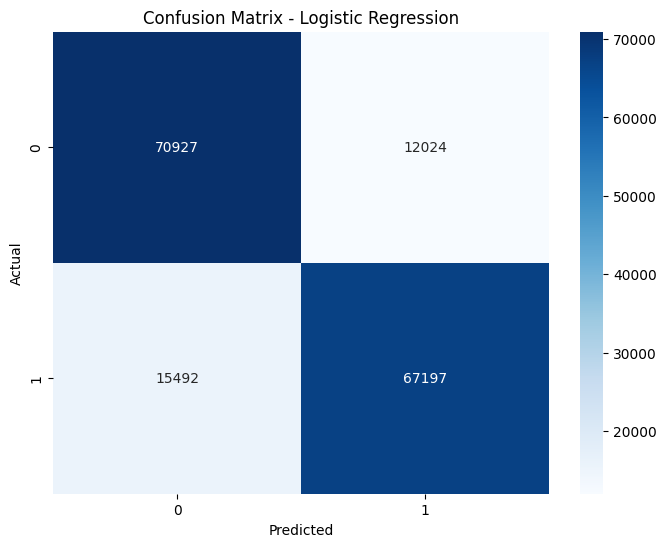

In [99]:
# Evaluasi Logistic Regression
best_cm_logreg, best_accuracy_logreg, best_f1_logreg, best_precision_logreg, best_recall_logreg = evaluate_model(y_test, best_y_pred_logreg)
print("Logistic Regression:")
print("Accuracy:", best_accuracy_logreg)
print("F1 Score:", best_f1_logreg)
print("Precision:", best_precision_logreg)
print("Recall:", best_recall_logreg)

plot_confusion_matrix(best_cm_logreg, "Logistic Regression")

Random Forest:
Accuracy: 0.9811277469210336
F1 Score: 0.9811225669160674
Precision: 0.9817104191103297
Recall: 0.9811277469210336


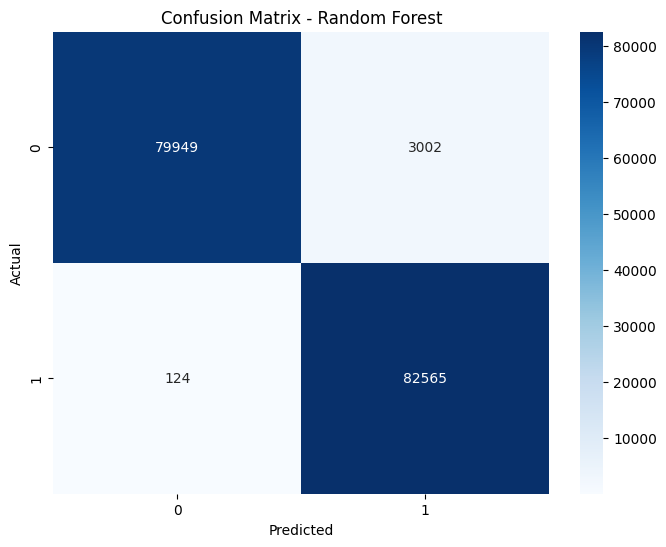

In [95]:
# Evaluasi Random Forest
best_cm_rf, best_accuracy_rf, best_f1_rf, best_precision_rf, best_recall_rf = evaluate_model(y_test, best_y_pred_rf)
print("Random Forest:")
print("Accuracy:", best_accuracy_rf)
print("F1 Score:", best_f1_rf)
print("Precision:", best_precision_rf)
print("Recall:", best_recall_rf)

plot_confusion_matrix(best_cm_rf, "Random Forest")


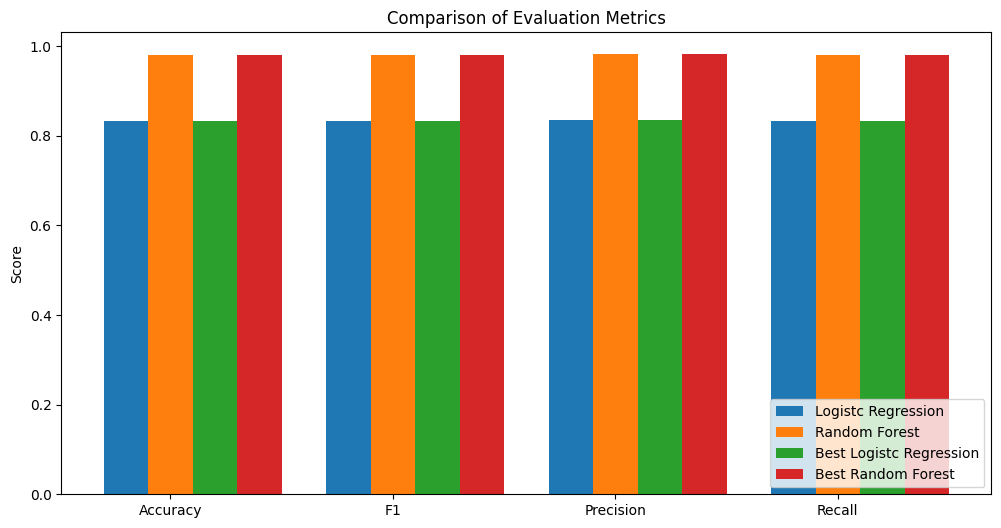

In [101]:
# Visualisasi perbandingan metrik evaluasi
metrics = ['Accuracy','F1', 'Precision', 'Recall']
rf_scores = [accuracy_rf, f1_rf, precision_rf, recall_rf]
logreg_scores = [accuracy_logreg, f1_logreg, precision_logreg, recall_logreg]
best_logreg_score = [best_accuracy_logreg, best_f1_logreg, best_precision_logreg, best_recall_logreg]
best_rf_score = [best_accuracy_rf, best_f1_rf, best_precision_rf, best_recall_rf]

x = np.arange(len(metrics))
width=0.20

plt.figure(figsize=(12, 6))
plt.bar(x- width,logreg_scores, width=width, label='Logistc Regression', align='center')
plt.bar(x, rf_scores, width=width, label='Random Forest', align='center')
plt.bar(x + width, best_logreg_score, width=width, label='Best Logistc Regression', align='center')
plt.bar(x + 2*width, best_rf_score, width=width, label='Best Random Forest', align='center')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.legend(loc = 'lower right')
plt.show()
